In [86]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [87]:
data = pd.read_csv('../quality_check_measurements.csv')
data = data.drop(columns=['runName']).transpose()
data

,0
0,1863
1,945
2,615
3,956
4,721
...,...
95,702
96,813
97,873
98,713


## 01: Boxplot und Lageparameter

In [88]:
data1 = data.copy()

In [89]:
# Lageparameter sind hier zu entnehmen
data1.describe()

,0
count,100.000000
mean,734.380000
std,147.654236
min,580.000000
25%,655.500000
50%,713.000000
75%,769.750000
max,1863.000000


durchschnittliche Laufzeit (ms)


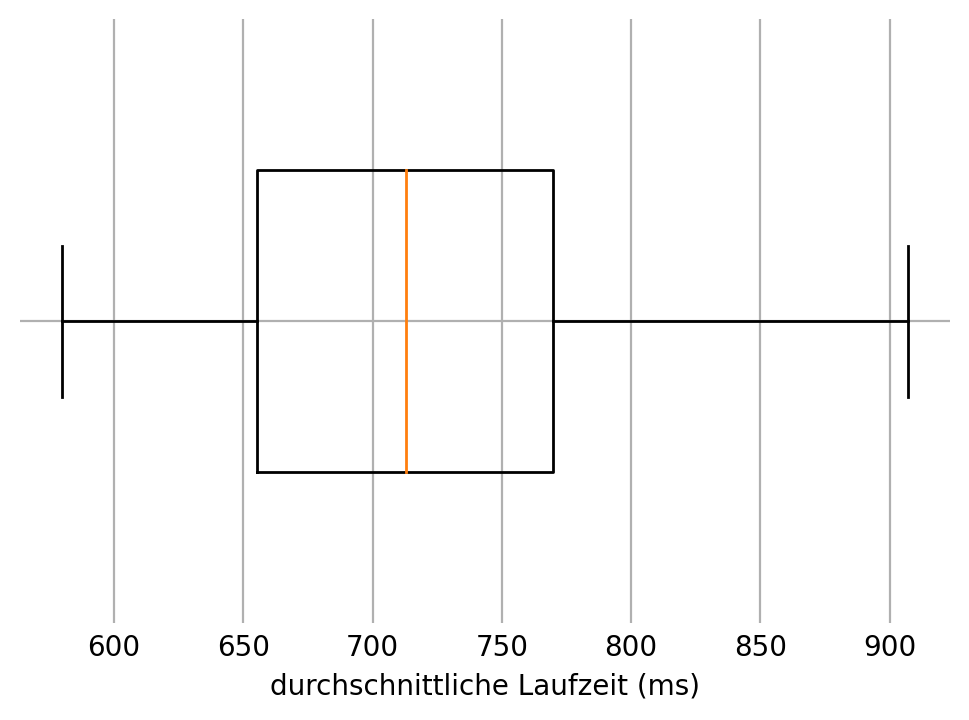

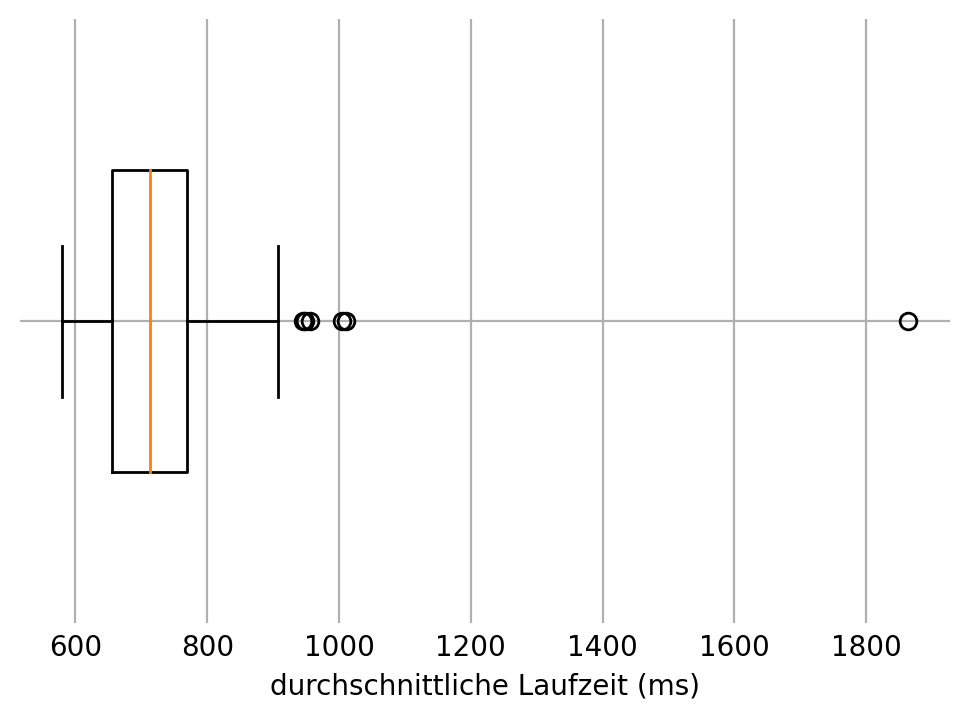

In [90]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
fig1, ax1 = plt.subplots(figsize=(6,4), dpi=200)

# TODO: gucken wie extrem die ausreißer sind bei showfliers -> Eigendlich ganz sinnvoll
boxplot = ax.boxplot(data1, notch=False, showfliers=False, patch_artist=False, vert=False ,widths=0.5, labels=[""])
boxplot_with_fliers = ax1.boxplot(data1, notch=False, showfliers=True, patch_artist=False, vert=False ,widths=0.5, labels=[""])

ax.set(xlabel='durchschnittliche Laufzeit (ms)')
ax1.set(xlabel='durchschnittliche Laufzeit (ms)')

print(ax.get_xlabel())
ax.grid()
ax1.grid()

for spine in ax.spines.values():
    spine.set_visible(False)

for spine in ax1.spines.values():
    spine.set_visible(False)

ax.tick_params(axis='both', length=0)
ax1.tick_params(axis='both', length=0)

fig.savefig('quality_check_boxplot.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')
fig1.savefig('quality_check_boxplot_with_fliers.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')

## 02: Daten auf Normalverteilung überprüfen

In [91]:
data2 = data.copy()

### 02.1 Ausreißer entfernen

In [103]:
print(len(data2))
data3 = data2.copy()
data3 = data3.sort_values(0)
data3[0] = data3[0] - min(data3[0])


quantile_threshold = 0.01
minimum_threshold, maximum_threshold = (data3.quantile(quantile_threshold).tolist()[0], data3.quantile(1 - quantile_threshold).tolist()[0])
print(minimum_threshold, maximum_threshold)

data3 = data3.loc[data3[0] > minimum_threshold]
data3 = data3.loc[data3[0] < maximum_threshold]

print(len(data3))


100
1.98 439.52000000000436
98


### 2.2 Histogramm erstellen

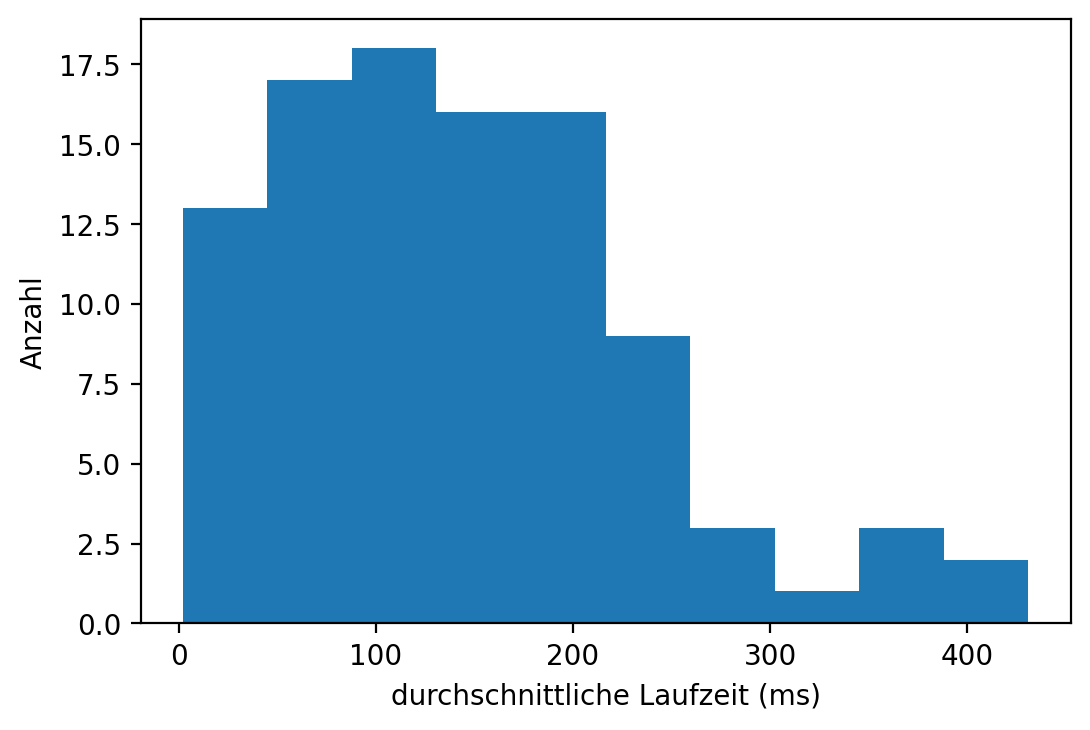

In [101]:
fig, ax = plt.subplots(figsize=(6,4), dpi=200)
ax.hist(data3)
ax.set(xlabel='durchschnittliche Laufzeit (ms)', ylabel='Anzahl')
fig.savefig('quality_check_hist.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')

### 02.3 QQ-Plot erstellen

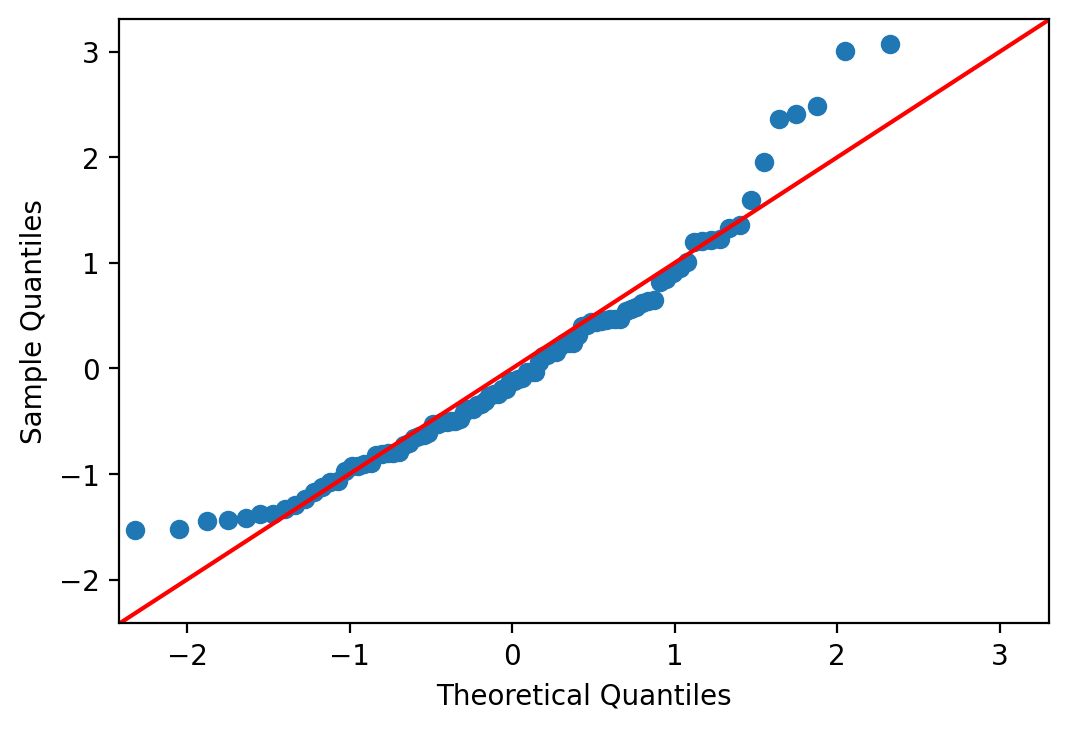

In [102]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(6,4), dpi=200)
    fig = sm.qqplot(data3, line='45',fit=True)
    fig.savefig('quality_check_qq_plot.svg', dpi=300, bbox_inches='tight', pad_inches=0, format='svg')